<a href="https://colab.research.google.com/github/dimitrijanovsky/Intro-to-Java-Programming/blob/master/firstmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashiom_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_lables) = fashiom_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_lables)

10000

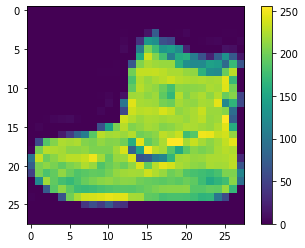

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

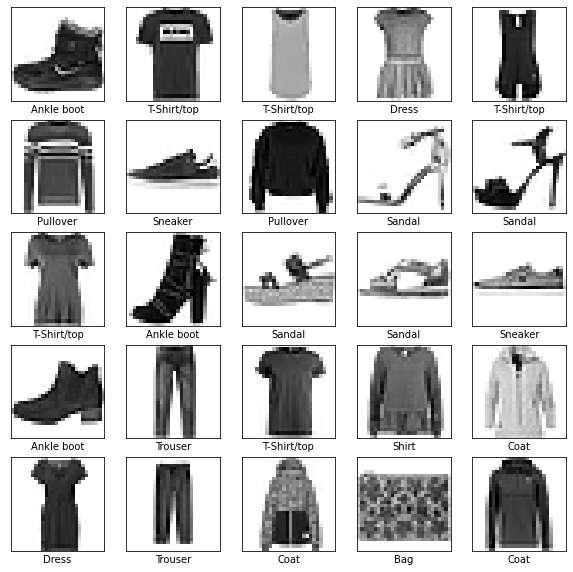

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)   

])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0854 - accuracy: 0.6696
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6414 - accuracy: 0.7690
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5683 - accuracy: 0.7964
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5260 - accuracy: 0.8140
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8245
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4780 - accuracy: 0.8317
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4628 - accuracy: 0.8379
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4507 - accuracy: 0.8407
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4406 - accuracy: 0.8443
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.432

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.4632 - accuracy: 0.8315

Test accuracy:  0.8314999938011169


In [33]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(test_images)

In [35]:
predictions[0]

array([7.8943975e-07, 4.3061377e-08, 9.9032713e-06, 7.7986051e-06,
       1.2299845e-05, 1.4925738e-01, 1.6774948e-05, 3.1396437e-01,
       5.8976738e-03, 5.3083295e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_lables[0]

9

In [38]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

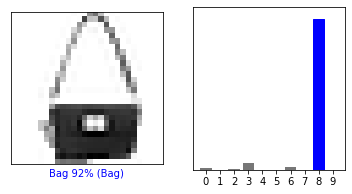

In [46]:
i = 31
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_lables)
plt.show()

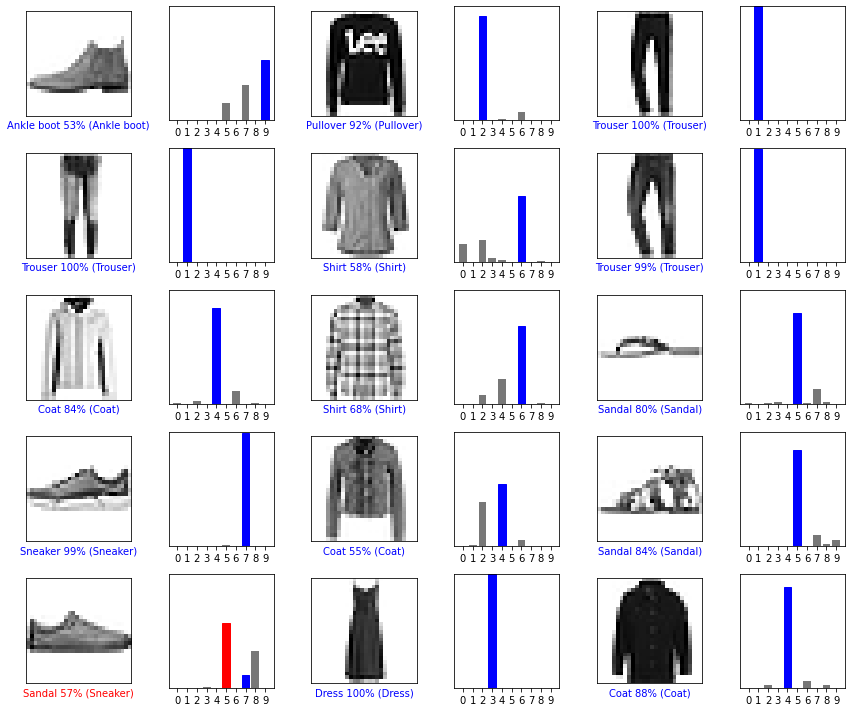

In [49]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_lables, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_lables)
plt.tight_layout()
plt.show()

In [50]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [52]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0338876e-04 3.1137638e-06 9.1962242e-01 2.4883744e-05 9.8883621e-03
  3.9341996e-10 7.0160925e-02 7.4463287e-18 9.6869400e-05 4.1417048e-12]]


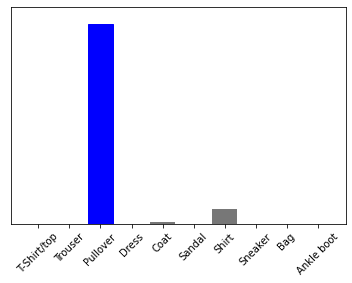

In [55]:
plot_value_array(1, predictions_single[0],test_lables)
_= plt.xticks(range(10), class_names, rotation=45)